# Importing Libraries

In [1]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split, GridSearchCV 
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, average_precision_score
import nltk
nltk.download('vader_lexicon')
from nltk.sentiment import SentimentIntensityAnalyzer
nltk.download('punkt')
nltk.download('wordnet')
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer, WordNetLemmatizer
import matplotlib.pyplot as plt
# from wordcloud import WordCloud
import seaborn as sns
from textblob import TextBlob

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\BIMSARA\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\BIMSARA\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\BIMSARA\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


# Importing and Reading the dataset

In [2]:
# Defining the path to the TSV file
tsv_file_path = "amazon_reviews_us_Electronics_v1_00.tsv"

# Load the first 50000 rows of the TSV file into a pandas dataframe
data = pd.read_csv(tsv_file_path, delimiter='\t', on_bad_lines='skip', nrows=100000, 
                   usecols=['review_body', 'star_rating'])


# # Load the first 50000 rows of the TSV file into a pandas dataframe
# data = pd.read_csv(tsv_file_path, delimiter = '\t', on_bad_lines='skip', nrows=50000)
data.head()
data.dropna()

,star_rating,review_body
0,5,As described.
1,5,It works as advertising.
2,5,Works pissa
3,1,Did not work at all.
4,5,Works well. Bass is somewhat lacking but is pr...
...,...,...
99995,1,"Came from Compton lol, not what needed, luckil..."
99996,5,Mounted this in brick for our patio TV. Works ...
99997,5,Quick install. No problems. Saved me hundreds ...
99998,1,poor reception with a lot of static. replaced ...


# Performing EDA on dataset

### Distribution of star ratings visualisation

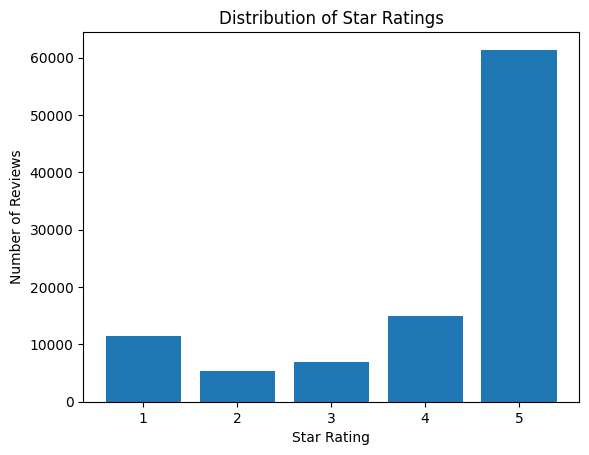

In [3]:
# Checking the distribution of star ratings
# Count the number of reviews for each star rating
star_counts = data['star_rating'].value_counts().sort_index()

# Setting up the plot
fig, ax = plt.subplots()
ax.bar(star_counts.index.astype(str), star_counts.values)

# Setting the plot title and axis labels
ax.set_title('Distribution of Star Ratings')
ax.set_xlabel('Star Rating')
ax.set_ylabel('Number of Reviews')
plt.show()

### Length of reviews visualisation

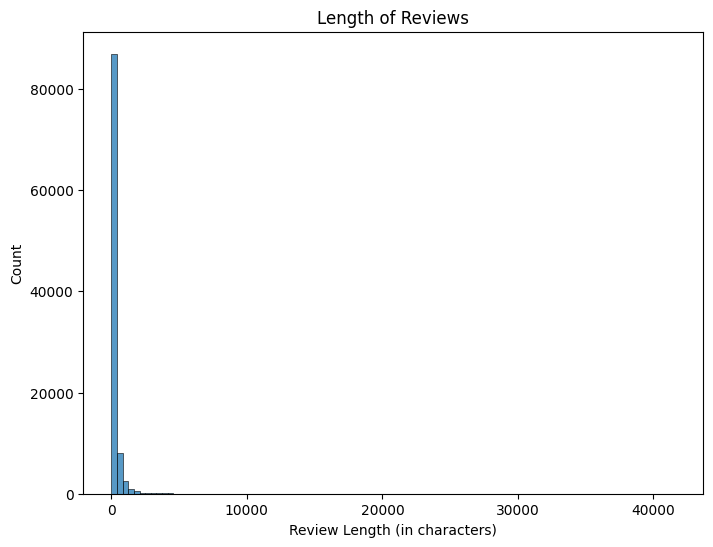

In [4]:
#Length of reviews
review_lengths = []
for review in data['review_body']:
    if isinstance(review, str):
        review_lengths.append(len(review)) #checks if the reviews are string, if floating-point numbers they are skipped
plt.figure(figsize=(8,6))
sns.histplot(review_lengths, bins=100)
plt.title('Length of Reviews')
plt.xlabel('Review Length (in characters)')
plt.ylabel('Count')
plt.show()

### Visualizing most used words

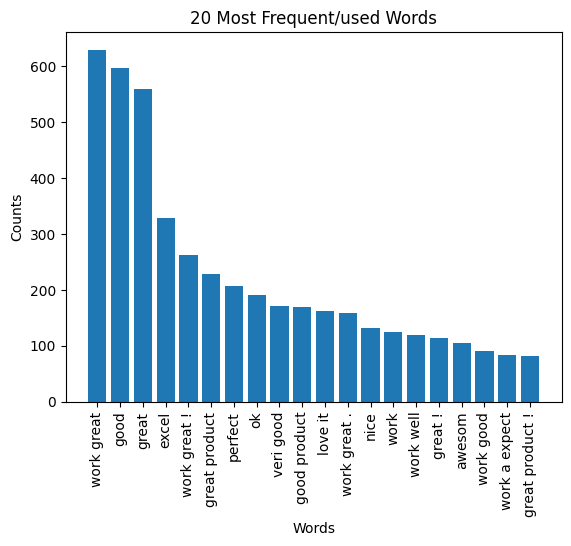

In [8]:
from collections import Counter
# create a Counter object from the preprocessed text
word_counts = Counter(preprocess_text(review) for review in data['review_body'])

# get the top 20 most common words and their counts
top_words = word_counts.most_common(20)
words = [word[0] for word in top_words]
counts = [word[1] for word in top_words]

# plot the bar chart
plt.bar(words, counts)
plt.title("20 Most Frequent/used Words")
plt.xlabel("Words")
plt.ylabel("Counts")
plt.xticks(rotation=90)
plt.show()

# Preprocessing the dataset

In [6]:
#separating text and labels
text = data['review_body']
labels = data['star_rating']


def preprocess_text(text):  
    if isinstance(text, str):  # check for text is of string class
        tokens = word_tokenize(text.lower())  # tokenizing the text
        stemmer = PorterStemmer()  # stemming(reducing words to root form)
        lemmatizer = WordNetLemmatizer()  # lemmatizing(converting words to base form)
        # stemming each token in the list of tokens
        stemmed_tokens = [stemmer.stem(token) for token in tokens]
        # Lemmatizing each stemmed token
        lemmatized_tokens = [lemmatizer.lemmatize(
            token) for token in stemmed_tokens]  
        # joining list of lemmatized tokens int a single string
        return " ".join(lemmatized_tokens)
    else:
        return ""  # return empty string if text is not string


# #Preprocessing text data
# vectorizer = TfidfVectorizer(stop_words='english', ngram_range=(1, 3))
# X = vectorizer.fit_transform(text.values.astype('U'))

# Mapping labels and splitting datasets into testing and training

In [9]:
#Mapping star_rating labels as sentiment labels
y = labels.apply(lambda x: 'positive' if x >= 4 else ('negative' if x <= 2 else 'neutral')) 

In [10]:
X = text.apply(preprocess_text)

In [11]:
#Splitting datasets into training, validation, and testing datasets
X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.20, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.25, random_state=42)

In [12]:
#vectorizing the preprocessed text data
vectorizer = TfidfVectorizer(stop_words='english', ngram_range=(1, 3))
X_train_val = vectorizer.fit_transform(X_train_val)
X_train = vectorizer.transform(X_train)
X_val = vectorizer.transform(X_val)
X_test = vectorizer.transform(X_test)

# Training the model with best parameters

In [ ]:
# hyper_param_grid = {
#     'C': [0.1, 1, 10],
#     'kernel': ['linear', 'rbf'],
#     'gamma': ['scale', 'auto']
# }
# grid_search = GridSearchCV(SVC(), hyper_param_grid, cv=5)
# grid_search


In [ ]:
# grid_saved = grid_search.fit(X_train_val, y_train_val)


In [ ]:
# print("done model training")

In [ ]:
# #Extracting the best hyperparameters and training the SVM model with those hyperparameters
# best_params = grid_search.best_params_
# svm_model = SVC(**best_params)  
# svm_model.fit(X_train, y_train)

# Training the Model

In [13]:
#Training the SVM model
svm_model = SVC(kernel='linear', C=1)  
svm_model.fit(X_train, y_train)

SVC(C=1, kernel='linear')

# Evalutating

In [14]:
# evaluating the model on the validation set
y_pred_val = svm_model.predict(X_val)
accuracy_val = accuracy_score(y_val, y_pred_val)
precision_val = precision_score(y_val, y_pred_val, average='weighted')
recall_val = recall_score(y_val, y_pred_val, average='weighted')
f1_val = f1_score(y_val, y_pred_val, average='weighted')

print('Validation Set Metrics:')
print(f'Accuracy: {accuracy_val:.3f}')
print(f'Precision: {precision_val:.3f}')
print(f'Recall: {recall_val:.3f}')
print(f'F1 Score: {f1_val:.3f}')

# evaluating the model on the test set
y_pred_test = svm_model.predict(X_test)
accuracy_test = accuracy_score(y_test, y_pred_test)
precision_test = precision_score(y_test, y_pred_test, average='weighted')
recall_test = recall_score(y_test, y_pred_test, average='weighted')
f1_test = f1_score(y_test, y_pred_test, average='weighted')

print('\nTest Set Metrics:')
print(f'Accuracy: {accuracy_test:.3f}')
print(f'Precision: {precision_test:.3f}')
print(f'Recall: {recall_test:.3f}')
print(f'F1 Score: {f1_test:.3f}')

Validation Set Metrics:
Accuracy: 0.862
Precision: 0.837
Recall: 0.862
F1 Score: 0.828

Test Set Metrics:
Accuracy: 0.872
Precision: 0.846
Recall: 0.872
F1 Score: 0.845


# Saving the Model

In [15]:
import joblib

# Saving the model and vectorizer
# filename = '/content/drive/MyDrive/svm_model.sav'
filename = 'svm_modelFin.sav'
joblib.dump(svm_model, filename)
joblib.dump(svm_model, 'svm_model_alt_fin.pk1')
# joblib.dump(vectorizer, '/content/drive/MyDrive/vectorizer.pk1')
joblib.dump(vectorizer, 'vectorizerFin.pk1')
joblib.dump(vectorizer, 'vectorizer_alt_fin.sav')

['vectorizer_alt_fin.sav']

# Loading the model

In [3]:
import joblib
import nltk
nltk.download('vader_lexicon')
from nltk.sentiment import SentimentIntensityAnalyzer

#Loading saved model and vectorizer
loaded_svm_model = joblib.load('svm_model.sav')
loaded_vectorizer = joblib.load('vectorizer.pk1')

#Using the loaded model and vectorizer to make predictions
#creating new text to tst the sentiment label
new_text = ['the product is the worst']
#vectorizing the new text
new_text_transformed = loaded_vectorizer.transform(new_text).toarray()
#predicting using loaded model
prediction = loaded_svm_model.predict(new_text_transformed)

#getting the polarity score for the text using sentiment analyzer
analyzer = SentimentIntensityAnalyzer()
new_scores = analyzer.polarity_scores(new_text[0])
compound_score = new_scores['compound']
percentage_score =(round((compound_score + 1) * 50))

print(f"Predicted Label: {prediction}")
print(f"Compound score: {compound_score}")
#percentage score(trustworthy score) between 0 -100
print(f"Overall Rating score: {percentage_score}")

Predicted Label: ['negative']
Compound score: -0.6249
Overall Rating score: 19


[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\BIMSARA\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


### References

1. https://neptune.ai/blog/vectorization-techniques-in-nlp-guide
2. https://towardsdatascience.com/building-bar-charts-using-matplotlib-c7cf6db3e728
3. https://www.youtube.com/watch?v=QpzMWQvxXWk&t=2166s